#### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import(
    GroupKFold,
    LeaveOneGroupOut,
    cross_validate,
    GridSearchCV,
)

#### Load the dataset

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
patient_list = [p for p in range(10)]

X['patient'] = np.random.choice(patient_list, size=len(X))

X.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patient
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,4


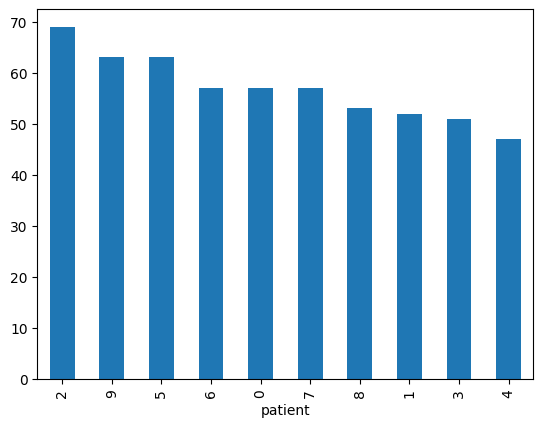

In [ ]:
X['patient'].value_counts().plot.bar()
plt.show()

In [ ]:
X_train = X[X['patient'] != 7]
y_train = y.iloc[X_train.index]

X_test = X[X['patient'] == 7]
y_test = y.iloc[X_test.index]

#### Group K-Fold Cross-Validation

In [ ]:
logit = LogisticRegression(
    penalty='l2', C=10, solver='liblinear', random_state=42, max_iter=10000
)

gkf = GroupKFold(n_splits=5)

clf = cross_validate(
    logit,
    X_train.drop('patient', axis=1),
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=gkf.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
)

clf['test_score']

array([0.92753623, 0.96491228, 0.95454545, 0.90909091, 0.96330275])

In [ ]:
clf['train_score']

array([0.96839729, 0.95979899, 0.97512438, 0.97014925, 0.96029777])

In [ ]:
print('mean train set accuracy:', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy:', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy: 0.9667535369522877  +-  0.005905022018001389
mean test set accuracy: 0.9438775257031509  +-  0.02195792171738568


In [ ]:
logit.fit(
    X_train.drop('patient', axis=1),
    y_train)

train_preds = logit.predict(X_train.drop('patient', axis=1))
test_preds = logit.predict(X_test.drop('patient', axis=1))

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.962890625
Test Accuracy:  0.9649122807017544


#### Leave One Group Out

In [ ]:
logit = LogisticRegression(
    penalty = 'l2', C=10, solver='liblinear', random_state=4, max_iter=10000
)

logo = LeaveOneGroupOut()

clf = cross_validate(
    logit,
    X_train.drop('patient', axis=1),
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=logo.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),

    )
clf['test_score']

array([0.96491228, 0.94230769, 0.92753623, 0.96078431, 0.93617021,
       0.96825397, 0.98245614, 0.86792453, 0.98412698])

In [ ]:
print('mean train set accuracy:', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy:', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy: 0.963387671133628  +-  0.004759960409970431
mean test set accuracy: 0.9482747058242964  +-  0.03391916169762392


#### Hyperparameter tuning with Leave 1 Group Out

In [ ]:
logit = LogisticRegression(
    penalty='l2', C=1, solver='liblinear', random_state=42, max_iter=10000
)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
)

logo = LeaveOneGroupOut()

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=logo.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
    refit=True,
)

search = clf.fit(
    X_train.drop('patient', axis=1),
    y_train,
)

search.best_params_

{'C': 10, 'penalty': 'l1'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.931471,0.027119
1,"{'C': 0.1, 'penalty': 'l2'}",0.940663,0.032606
2,"{'C': 1, 'penalty': 'l1'}",0.950258,0.031941
3,"{'C': 1, 'penalty': 'l2'}",0.949885,0.033233
4,"{'C': 10, 'penalty': 'l1'}",0.952881,0.029101
5,"{'C': 10, 'penalty': 'l2'}",0.948275,0.033919


Text(0.5, 0, 'Hyperparameter space')

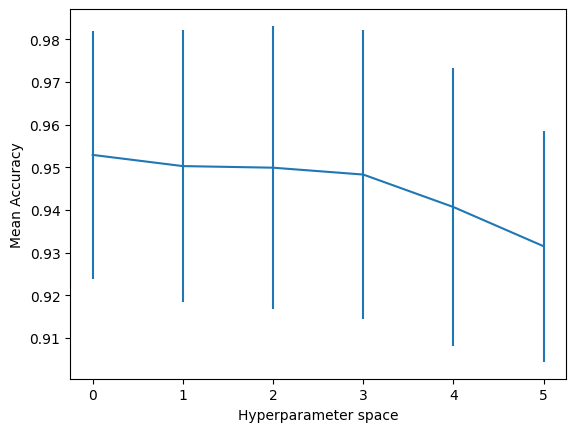

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space')

In [ ]:
train_preds = search.predict(X_train.drop('patient', axis=1))
test_preds = search.predict(X_test.drop('patient', axis=1))

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9765625
Test Accuracy:  0.9649122807017544
